In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

sns.set_theme(style="whitegrid", palette="viridis", context="notebook")

# Load the data
df = pd.read_csv('../seeds/acceptance_report_raw.csv')

In [28]:
df[df["state"] == "ACCEPTED"].sample(10).sort_values("currency", ascending = False)

,external_ref,status,source,ref,date_time,state,cvv_provided,amount,country,currency,rates
5005,zL0XdfO_Mi3r5N2LoMXhM,True,GLOBALPAY,evt_1EU-xlmMOjaAUxYVwbw70pq,2019-06-16T00:00:00.000Z,ACCEPTED,False,164911.89,AE,USD,"{""CAD"":1.3685677815202024,""EUR"":0.676181833811..."
2793,yo74vRuHS3tcNXJxv9CS4,True,GLOBALPAY,evt_1EvEdp8KVmITO4K-1CBfQXa,2019-04-04T14:24:00.000Z,ACCEPTED,False,83866.06,US,USD,"{""CAD"":1.402461255042701,""EUR"":0.8274282740968..."
1441,ZdZ1uiaoPMpHQzAEiHkHa,True,GLOBALPAY,evt_1EIdIPeGK1jRLoU51ocMjd-,2019-02-18T04:48:00.000Z,ACCEPTED,False,44126.68,US,USD,"{""CAD"":1.4161936055176774,""EUR"":0.882828231586..."
1450,MuJsLQ9A86VpuTs6ddMfI,True,GLOBALPAY,evt_1E6Cax_Wk44xCIpPuAGPW-2,2019-02-18T00:00:00.000Z,ACCEPTED,False,43933.30,UK,GBP,"{""CAD"":1.4167231630836008,""EUR"":0.884054441130..."
3343,m3KOFzetioiDmyw-az8ri,True,GLOBALPAY,evt_1EIrJDs5lnrNN0n_KVhKYYQ,2019-04-22T14:24:00.000Z,ACCEPTED,False,98614.46,UK,GBP,"{""CAD"":1.3816366225754704,""EUR"":0.759194111598..."
4817,NCg_tjav69qnWoVd2VaMy,True,GLOBALPAY,evt_1E7BRs31Rt2yxQleTslViSM,2019-06-10T09:36:00.000Z,ACCEPTED,False,157036.29,FR,EUR,"{""CAD"":1.3636713666914126,""EUR"":0.710100829216..."
769,k9Mb1I6hENjlCAOJT0Q8q,True,GLOBALPAY,evt_1EOQq8GO8i3e4wMBeSmLrQZ,2019-01-26T19:12:00.000Z,ACCEPTED,False,26207.09,FR,EUR,"{""CAD"":1.394599280031486,""EUR"":0.8724105820806..."
559,BgKpuCG4wdZmV19X3MIGt,True,GLOBALPAY,evt_1EeItjTJW8GOOQd6QUumo2b,2019-01-19T19:12:00.000Z,ACCEPTED,False,21005.17,FR,EUR,"{""CAD"":1.440065192658934,""EUR"":0.8832941647580..."
3143,LfOAW7XjuqXD7UwPcbFYc,True,GLOBALPAY,evt_1ElR1LYtv_BtKYEIEO0wB-N,2019-04-15T14:24:00.000Z,ACCEPTED,False,103557.89,CA,CAD,"{""CAD"":1.362348928154823,""EUR"":0.8048026329209..."
22,vbvYmbZ37l0sqUGN302sG,True,GLOBALPAY,evt_1EC-tQBmz9QwudbIT5eUWS0,2019-01-01T09:36:00.000Z,ACCEPTED,False,856.11,CA,CAD,"{""CAD"":1.4172664709546088,""EUR"":0.923740950947..."


In [29]:
print(f'Min Trasnsaction Date: {df['date_time'].min()}')
print(f'Max Trasnsaction Date: {df['date_time'].max()}')
print(f'DF total rows: {df.shape[0]}')
print(f'DF total columns: {df.shape[1]}')

Min Trasnsaction Date: 2019-01-01T00:00:00.000Z
Max Trasnsaction Date: 2019-06-30T19:12:00.000Z
DF total rows: 5430
DF total columns: 11


/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_51939/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_51939/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/qy1z7_41257bjbrp99_83xs00000gn/T/ipykernel_51939/3998332534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis',
/var/folders/dk/

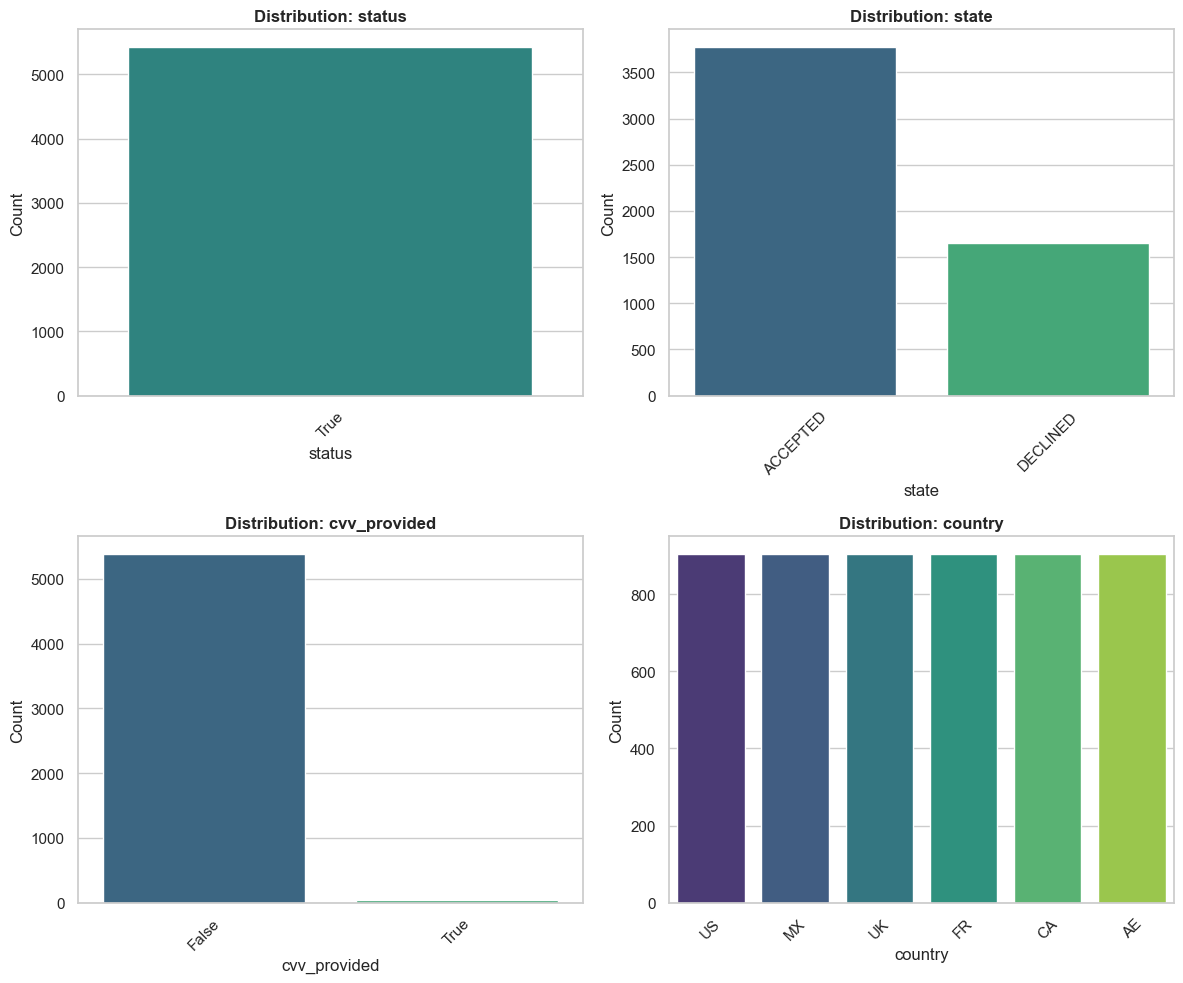

In [30]:
cols_to_check = ['status', 'state', 'cvv_provided', 'country']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily loop through them

for i, col in enumerate(cols_to_check):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', 
                  order=df[col].value_counts().index)
    
    axes[i].set_title(f'Distribution: {col}', fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../analyses/eda_graphics/distribution_grid.png')
plt.show()

In [31]:
# Total rows for overview
print(f"Total records: {df.shape[0]}")

# Check for nulls
print(df.isnull().sum())

# Check for dups (external references look like they should be unique)
print(f"Duplicate external refs: {df['external_ref'].duplicated().sum()}")
print(f"Duplicate refs: {df['ref'].duplicated().sum()}")


# Test potential json errors
# Does every row have a valid JSON string in 'rates'?
def is_valid_json(x):
    try:
        json.loads(x.replace("'", '"')) # Handling potential single quote issues
        return True
    except:
        return False

invalid_json_count = df[~df['rates'].apply(is_valid_json)].shape[0]
print(f"Rows with broken JSON rates: {invalid_json_count}")

Total records: 5430
external_ref    0
status          0
source          0
ref             0
date_time       0
state           0
cvv_provided    0
amount          0
country         0
currency        0
rates           0
dtype: int64
Duplicate external refs: 0
Duplicate refs: 0
Rows with broken JSON rates: 0


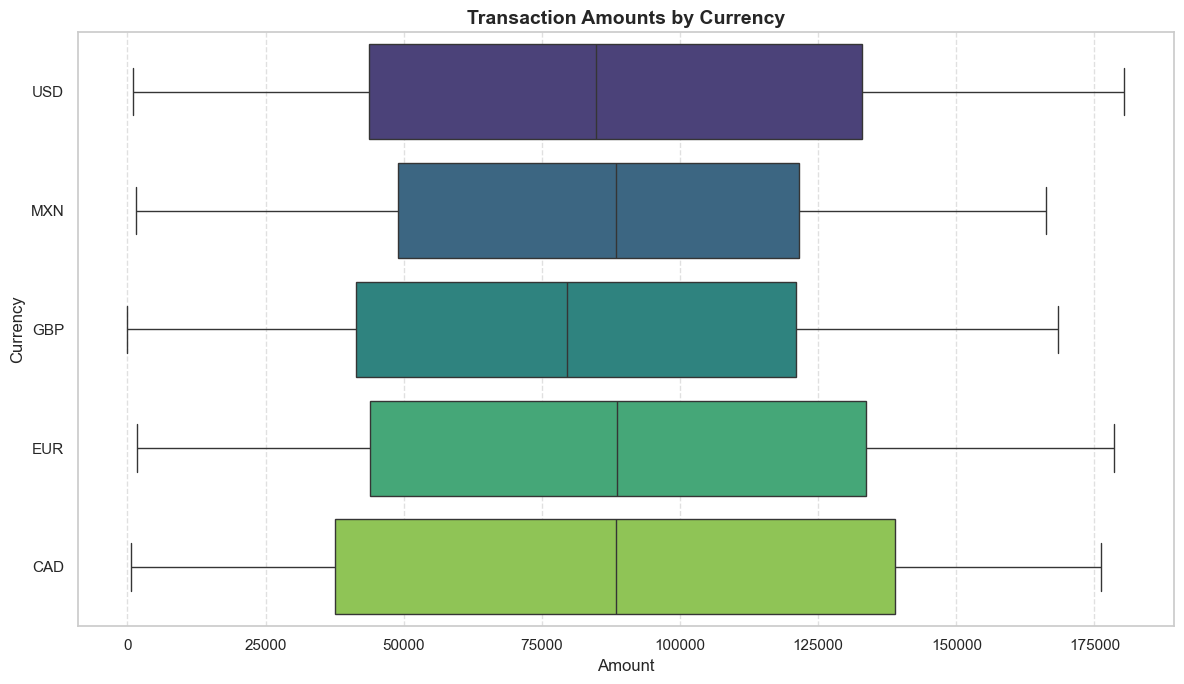

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create the figure - changed (1, 1) to just a single plot or fix indexing
fig, ax = plt.subplots(figsize=(12, 7)) 

# 2. Plotting
sns.boxplot(
    data=df, 
    x='amount', 
    y='currency', 
    ax=ax, 
    hue='currency',   # Explicitly assign hue
    legend=False,     # Hide the legend to keep it clean
    palette='viridis'
)
# 3. Formatting
ax.set_title('Transaction Amounts by Currency', fontsize=14, fontweight='bold')
ax.set_xlabel('Amount', fontsize=12)
ax.set_ylabel('Currency', fontsize=12) # Fixed label to match the data
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('amount_field_distributions_by_currency.png')
plt.show()

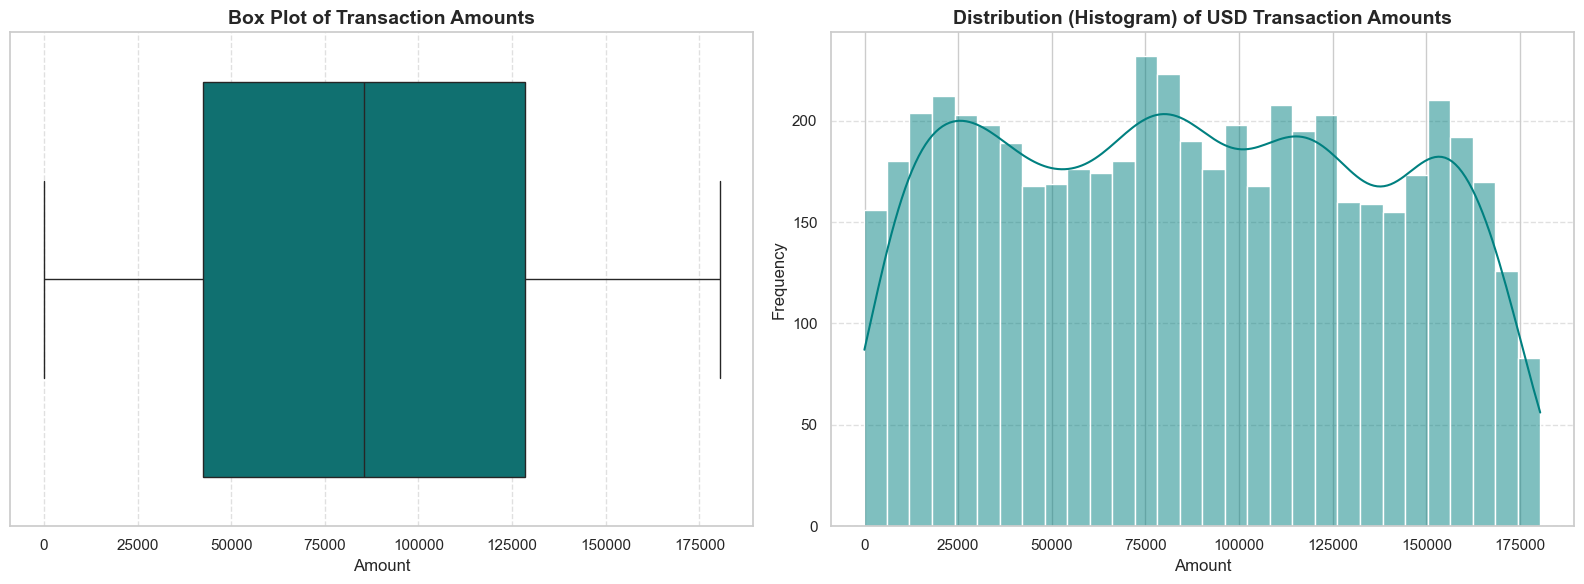

In [33]:
# 3. Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Plot 1: Box Plot (Left) ---
sns.boxplot(x=df['amount'], ax=axes[0], color='teal')
axes[0].set_title('Box Plot of Transaction Amounts', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Amount', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.6)

# --- Plot 2: Histogram/KDE (Right) ---
sns.histplot(df['amount'], kde=True, ax=axes[1], color='teal', bins=30)
axes[1].set_title('Distribution (Histogram) of USD Transaction Amounts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Amount', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('../analyses/eda_graphics/amount_field_distributions.png')
plt.show()

In [34]:
from IPython.display import display

cols_to_check = ['status', 'state', 'cvv_provided', 'country', 'country']

for col in cols_to_check:
    print(f"Distribution for: {col}")
    display(df[col].value_counts().to_frame())

Distribution for: status


,count
status,
True,5430


Distribution for: state


,count
state,
ACCEPTED,3777
DECLINED,1653


Distribution for: cvv_provided


,count
cvv_provided,
False,5390
True,40


Distribution for: country


,count
country,
US,905
MX,905
UK,905
FR,905
CA,905
AE,905


Distribution for: country


,count
country,
US,905
MX,905
UK,905
FR,905
CA,905
AE,905
